In [235]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = np.loadtxt('features.csv', delimiter=',')

print(data.shape)

(152, 1530)


In [236]:
variances = np.var(data, axis=0)

indices_of_least_variance = np.argsort(variances)[:10]
print("Features with the least variance:")
print(indices_of_least_variance,variances[indices_of_least_variance])

indices_of_most_variance = np.argsort(variances)[-10:]
print("Features with the most variance:")
print(indices_of_most_variance,variances[indices_of_most_variance])

Features with the least variance:
[771 774 744 780 843 777 861 750 753 741] [0.1345037  0.1349112  0.13849206 0.14017222 0.14302973 0.14445151
 0.15311575 0.15657468 0.15671253 0.15709589]
Features with the most variance:
[1503 1482 1443 1509 1521 1455 1464 1518 1497 1506] [2.77532686 2.80105321 2.81938194 2.82861597 2.87798357 3.09420954
 3.14772192 3.19453374 3.30973006 3.48601461]


We apply PCA to extract the features with the highest variance across subjects.
Let's first visualise the variation of variance of all features in decreasing order of variance.

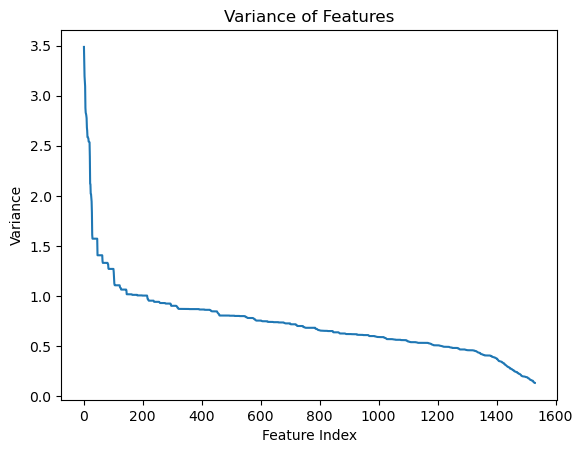

In [237]:
sorted_variances = np.sort(variances)[::-1]
x = np.arange(1, len(sorted_variances) + 1)

plt.plot(x, sorted_variances)
plt.xlabel('Feature Index')
plt.ylabel('Variance')
plt.title('Variance of Features')
plt.show()

From the graph, it appears that the knee point is around the 210th mark. So we can consider the top 200 features alone in our model.

In [238]:
indices_of_interest = np.argsort(variances)[-100:]
indices_of_interest

array([ 826,  196,  106, 1096, 1006, 1366,  466, 1186,  736,  556,   16,
        376,  646, 1276,  916,  286, 1452,  447,  393,  547,  367, 1087,
        187,  907, 1177,    7,  997,  817,   97, 1267, 1447,  727,  637,
       1357,  277,  457,  360,  712,   82,  172, 1522, 1162,  532,  982,
       1252,  442,  892, 1342,  622,  352,  802, 1072, 1432,  262, 1264,
        274,  544,   94, 1444,  364,  634,  994,  904,  454, 1354, 1084,
        814,    4,  184,  724, 1174, 1449, 1524, 1512, 1515, 1500, 1458,
       1473, 1470, 1491, 1446, 1527, 1485, 1440, 1467, 1461, 1476, 1494,
       1488, 1479, 1503, 1482, 1443, 1509, 1521, 1455, 1464, 1518, 1497,
       1506])

In [239]:
new_data = data[:,indices_of_interest]
new_data.shape

(152, 100)

In [240]:
import pandas as pd

indices_of_interest_sorted = np.sort(indices_of_interest)
converted_indices = ['ch' + str(i//51 + 1) + 'b' + str((i%51)//3 + 1) + 'f' + str(i%3 + 1) for i in indices_of_interest_sorted]
print(converted_indices)
dfX = pd.DataFrame(new_data, columns=converted_indices)
dfX

['ch1b2f2', 'ch1b3f2', 'ch1b6f2', 'ch2b11f2', 'ch2b15f2', 'ch2b16f2', 'ch3b2f2', 'ch4b7f2', 'ch4b11f2', 'ch4b12f2', 'ch4b15f2', 'ch6b3f2', 'ch6b7f2', 'ch6b8f2', 'ch6b11f2', 'ch7b16f2', 'ch8b2f1', 'ch8b3f2', 'ch8b4f2', 'ch8b7f2', 'ch8b13f1', 'ch9b12f2', 'ch9b14f1', 'ch9b16f2', 'ch9b17f2', 'ch10b3f2', 'ch11b8f2', 'ch11b12f2', 'ch11b13f2', 'ch11b16f2', 'ch13b4f2', 'ch13b8f2', 'ch13b9f2', 'ch13b12f2', 'ch14b17f2', 'ch15b4f2', 'ch15b5f2', 'ch15b8f2', 'ch16b13f2', 'ch16b17f2', 'ch17b1f2', 'ch17b4f2', 'ch18b9f2', 'ch18b13f2', 'ch18b14f2', 'ch18b17f2', 'ch20b5f2', 'ch20b9f2', 'ch20b10f2', 'ch20b13f2', 'ch22b1f2', 'ch22b5f2', 'ch22b6f2', 'ch22b9f2', 'ch23b14f2', 'ch24b1f2', 'ch24b2f2', 'ch24b5f2', 'ch25b10f2', 'ch25b14f2', 'ch25b15f2', 'ch26b1f2', 'ch27b6f2', 'ch27b10f2', 'ch27b11f2', 'ch27b14f2', 'ch29b2f2', 'ch29b5f1', 'ch29b6f1', 'ch29b6f2', 'ch29b7f1', 'ch29b7f2', 'ch29b8f1', 'ch29b9f1', 'ch29b10f1', 'ch29b11f1', 'ch29b12f1', 'ch29b13f1', 'ch29b14f1', 'ch29b15f1', 'ch29b16f1', 'ch29b17f1', 

,ch1b2f2,ch1b3f2,ch1b6f2,ch2b11f2,ch2b15f2,ch2b16f2,ch3b2f2,ch4b7f2,ch4b11f2,ch4b12f2,...,ch30b9f1,ch30b10f1,ch30b11f1,ch30b12f1,ch30b13f1,ch30b14f1,ch30b15f1,ch30b15f2,ch30b16f1,ch30b17f1
0,0.930031,0.930031,0.930031,0.930031,0.930031,0.930031,0.930031,0.930031,0.930031,0.930031,...,-0.594928,1.134865,0.874829,-0.581090,-0.116631,-0.255558,0.051339,0.217653,-1.071918,-0.325657
1,0.978061,0.978061,0.978061,0.978061,0.978061,0.978061,0.978061,0.978061,0.978061,0.978061,...,-0.144231,-0.147107,1.141335,-0.237552,-0.256054,0.254371,-0.007790,-0.077945,-0.305387,0.051572
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1.740524,1.740524,1.740524,1.740524,1.740524,1.740524,1.740524,1.740524,1.740524,1.740524,...,2.977728,3.243464,3.257783,-1.040882,2.491262,-1.040882,2.625317,2.851609,1.965815,1.670576
4,1.820105,1.820105,1.820105,1.820105,1.820105,1.820105,1.820105,1.820105,1.820105,1.820105,...,-0.567257,0.099144,0.504104,-0.942132,-0.034406,0.032075,-0.835527,-0.258183,-0.668797,-0.840978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2.452017,2.452017,2.452017,2.452017,2.452017,2.452017,2.452017,2.452017,2.452017,2.452017,...,5.929893,4.711676,5.704190,4.420279,-0.679377,5.389732,5.043017,6.401328,3.656069,6.310358
148,1.939215,1.939215,1.939215,1.939215,1.939215,1.939215,1.939215,1.939215,1.939215,1.939215,...,1.532155,-0.390173,0.179198,1.928641,0.284084,1.264380,0.070723,0.851075,-0.401628,0.303965
149,-1.003246,-1.003246,-1.003246,-1.003246,-1.003246,-1.003246,-1.003246,-1.003246,-1.003246,-1.003246,...,-1.264171,1.146797,0.683201,-1.264171,0.362495,-1.071394,-0.314095,-0.588007,-0.391616,-1.069842
150,-0.161106,-0.161106,-0.161106,-0.161106,-0.161106,-0.161106,-0.161106,-0.161106,-0.161106,-0.161106,...,2.305834,3.407257,3.568783,1.977356,3.815582,3.194612,3.265658,3.700970,3.363085,2.115151


In [241]:
data_info = pd.read_csv('data_info.csv',usecols=[0,1])
data_info

,BASIC_INFO_ID,BASIC_INFO_AGE
0,sub-0001,41.0
1,sub-0002,26.0
2,sub-0003,28.0
3,sub-0004,22.0
4,sub-0005,24.0
...,...,...
145,sub-0187,22.0
146,sub-0188,21.0
147,sub-0189,23.0
148,sub-0191,22.0


In [242]:
data_info = data_info.loc[:120]
data_info

,BASIC_INFO_ID,BASIC_INFO_AGE
0,sub-0001,41.0
1,sub-0002,26.0
2,sub-0003,28.0
3,sub-0004,22.0
4,sub-0005,24.0
...,...,...
116,sub-0147,46.0
117,sub-0148,42.0
118,sub-0150,58.0
119,sub-0151,66.0


In [243]:
data_filt = data_info.dropna()
data_filt

,BASIC_INFO_ID,BASIC_INFO_AGE
0,sub-0001,41.0
1,sub-0002,26.0
2,sub-0003,28.0
3,sub-0004,22.0
4,sub-0005,24.0
...,...,...
116,sub-0147,46.0
117,sub-0148,42.0
118,sub-0150,58.0
119,sub-0151,66.0


In [244]:
subjects_list = data_filt['BASIC_INFO_ID'].unique().tolist()
sub_nums = [int(subject.split('-')[1]) for subject in subjects_list]
print(sub_nums)

arr = np.array(sub_nums)
existing_indices = arr - 1
existing_indices

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 34, 35, 36, 38, 39, 43, 44, 45, 46, 47, 49, 50, 52, 55, 56, 57, 58, 59, 60, 63, 64, 65, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 100, 101, 103, 105, 106, 107, 110, 111, 112, 113, 114, 115, 116, 117, 118, 121, 123, 126, 127, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152]


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        14,  15,  16,  17,  18,  20,  21,  22,  23,  24,  25,  26,  28,
        29,  30,  33,  34,  35,  37,  38,  42,  43,  44,  45,  46,  48,
        49,  51,  54,  55,  56,  57,  58,  59,  62,  63,  64,  67,  68,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  86,  87,  88,  90,  91,  92,  93,  94,  95,  96,  99,
       100, 102, 104, 105, 106, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 120, 122, 125, 126, 129, 130, 131, 132, 133, 134, 135, 136,
       137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 149, 150,
       151])

In [245]:
dfXExisting = dfX.loc[existing_indices]
dfXExisting

,ch1b2f2,ch1b3f2,ch1b6f2,ch2b11f2,ch2b15f2,ch2b16f2,ch3b2f2,ch4b7f2,ch4b11f2,ch4b12f2,...,ch30b9f1,ch30b10f1,ch30b11f1,ch30b12f1,ch30b13f1,ch30b14f1,ch30b15f1,ch30b15f2,ch30b16f1,ch30b17f1
0,0.930031,0.930031,0.930031,0.930031,0.930031,0.930031,0.930031,0.930031,0.930031,0.930031,...,-0.594928,1.134865,0.874829,-0.581090,-0.116631,-0.255558,0.051339,0.217653,-1.071918,-0.325657
1,0.978061,0.978061,0.978061,0.978061,0.978061,0.978061,0.978061,0.978061,0.978061,0.978061,...,-0.144231,-0.147107,1.141335,-0.237552,-0.256054,0.254371,-0.007790,-0.077945,-0.305387,0.051572
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1.740524,1.740524,1.740524,1.740524,1.740524,1.740524,1.740524,1.740524,1.740524,1.740524,...,2.977728,3.243464,3.257783,-1.040882,2.491262,-1.040882,2.625317,2.851609,1.965815,1.670576
4,1.820105,1.820105,1.820105,1.820105,1.820105,1.820105,1.820105,1.820105,1.820105,1.820105,...,-0.567257,0.099144,0.504104,-0.942132,-0.034406,0.032075,-0.835527,-0.258183,-0.668797,-0.840978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0.858328,0.858328,0.858328,0.858328,0.858328,0.858328,0.858328,0.858328,0.858328,0.858328,...,-0.443800,0.843714,0.349544,-0.898823,-0.689137,-0.646238,-0.898823,-0.653458,-0.898823,-0.898823
147,2.452017,2.452017,2.452017,2.452017,2.452017,2.452017,2.452017,2.452017,2.452017,2.452017,...,5.929893,4.711676,5.704190,4.420279,-0.679377,5.389732,5.043017,6.401328,3.656069,6.310358
149,-1.003246,-1.003246,-1.003246,-1.003246,-1.003246,-1.003246,-1.003246,-1.003246,-1.003246,-1.003246,...,-1.264171,1.146797,0.683201,-1.264171,0.362495,-1.071394,-0.314095,-0.588007,-0.391616,-1.069842
150,-0.161106,-0.161106,-0.161106,-0.161106,-0.161106,-0.161106,-0.161106,-0.161106,-0.161106,-0.161106,...,2.305834,3.407257,3.568783,1.977356,3.815582,3.194612,3.265658,3.700970,3.363085,2.115151


In [246]:
X = dfXExisting.values
X.shape

(118, 100)

In [247]:
labels = data_filt.values[:,1]
labels

array([41.0, 26.0, 28.0, 22.0, 24.0, 26.0, 28.0, 28.0, 22.0, 24.0, 23.0,
       47.0, 25.0, 21.0, 23.0, 29.0, 52.0, 32.0, 37.0, 35.0, 31.0, 37.0,
       38.0, 22.0, 47.0, 22.0, 39.0, 57.0, 54.0, 57.0, 48.0, 49.0, 56.0,
       49.0, 28.0, 27.0, 27.0, 20.0, 49.0, 50.0, 29.0, 35.0, 57.0, 37.0,
       46.0, 30.0, 33.0, 63.0, 63.0, 32.0, 40.0, 40.0, 39.0, 53.0, 42.0,
       44.0, 35.0, 43.0, 24.0, 36.0, 28.0, 27.0, 53.0, 27.0, 33.0, 55.0,
       32.0, 20.0, 59.0, 21.0, 21.0, 36.0, 32.0, 27.0, 39.0, 25.0, 62.0,
       22.0, 22.0, 60.0, 29.0, 38.0, 30.0, 41.0, 28.0, 43.0, 41.0, 24.0,
       34.0, 35.0, 31.0, 33.0, 49.0, 22.0, 32.0, 58.0, 73.0, 20.0, 44.0,
       20.0, 34.0, 21.0, 22.0, 33.0, 41.0, 40.0, 23.0, 32.0, 42.0, 39.0,
       47.0, 33.0, 46.0, 46.0, 42.0, 58.0, 66.0, 49.0], dtype=object)

In [248]:
aug_labels = np.array(labels) + np.random.normal(0, 1, len(labels))
aug_labels

array([41.03799825148078, 26.69748661184026, 26.98919626667854,
       22.415968930003217, 24.42893310734212, 26.445126868856995,
       28.762695905388917, 27.717582937283893, 21.88448050956641,
       23.94758598366276, 23.565774287968043, 49.40162988240912,
       26.444151259680062, 21.081168986299275, 23.620807880055807,
       27.754264329432683, 51.25449456540941, 32.52526921869248,
       35.73646236772264, 35.00352645236643, 30.520778955395624,
       37.10500217124265, 37.5786619206516, 21.6832900780717,
       47.96268763772354, 22.147974925526686, 39.01530011776397,
       56.20894954915537, 55.01770862542588, 57.34306942842072,
       48.474762207250656, 50.062650092290696, 57.03175853786737,
       48.456794986312424, 27.3772284463986, 26.504395747064972,
       26.499672391418894, 19.004595672918402, 50.99597098799211,
       50.158405366759844, 27.211680213589883, 33.83711712358083,
       58.00793939476084, 39.41442978194618, 48.73202663398156,
       29.92354203588631

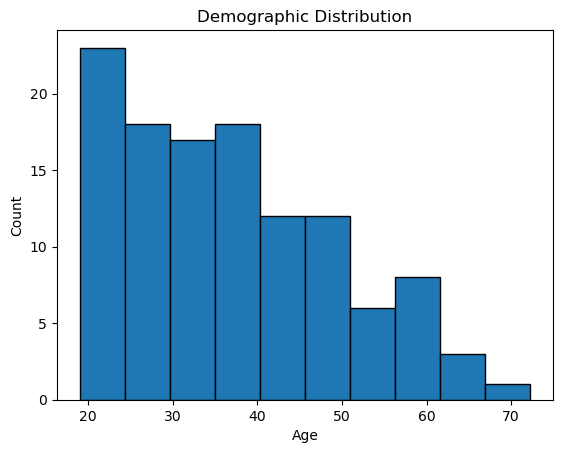

In [249]:
plt.hist(aug_labels, bins=10, edgecolor='black')

plt.title('Demographic Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

In [250]:
print("Mean: ",np.mean(labels))
print("STD: ",np.std(labels))


Mean:  36.95762711864407
STD:  12.424275082216532


In [251]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')

regressor.fit(X,aug_labels)

SVR()

In [252]:
sum(abs(regressor.predict(X) - aug_labels))/len(aug_labels)

9.575596609414427

In [253]:
r2 = regressor.score(X, aug_labels)
r2

0.06408635969559107

In [254]:
array2d = np.zeros((len(aug_labels),2))
print(array2d.shape)
array2d[:,0] = aug_labels
array2d[:,1] = regressor.predict(X)

(118, 2)


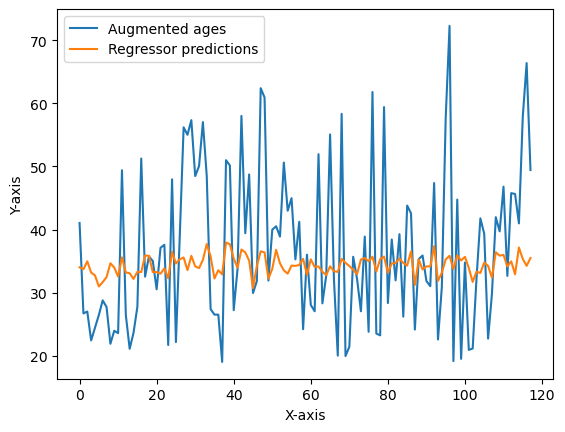

In [255]:
x = range(len(aug_labels))
plt.plot(x, array2d[:,0], label='Augmented ages')
plt.plot(x, array2d[:,1], label='Regressor predictions')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

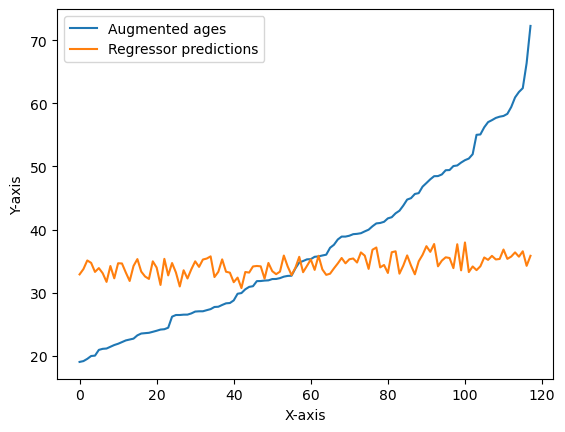

In [256]:
sorted = array2d[array2d[:, 0].argsort()]
x = range(len(aug_labels))

plt.plot(x, sorted[:,0], label='Augmented ages')
plt.plot(x, sorted[:,1], label='Regressor predictions')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

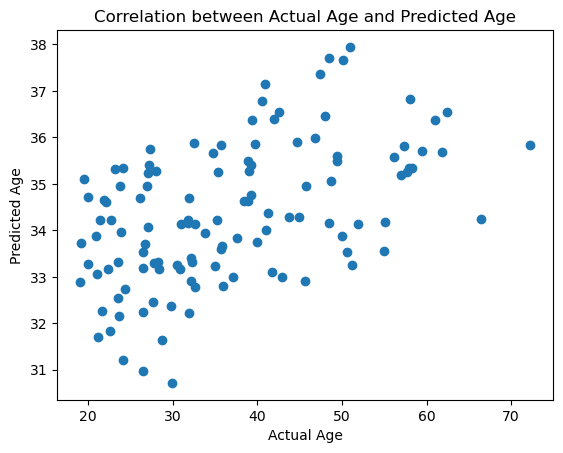

In [257]:
import matplotlib.pyplot as plt

plt.scatter(sorted[:,0], sorted[:,1])

plt.title('Correlation between Actual Age and Predicted Age')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')

plt.show()

In [258]:
from scipy.stats import pearsonr

corr, _ = pearsonr(sorted[:,0], sorted[:,1])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.508


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
0.060567277312108946


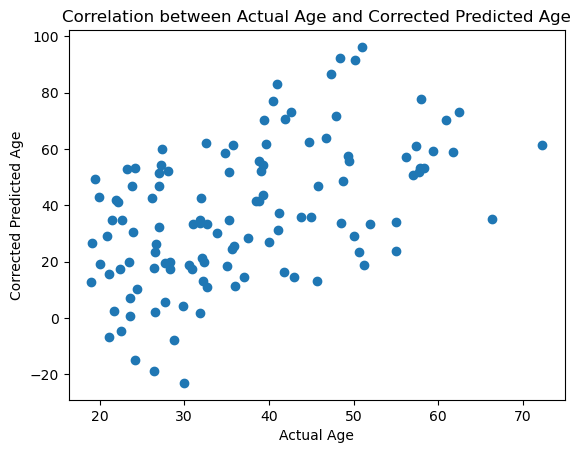

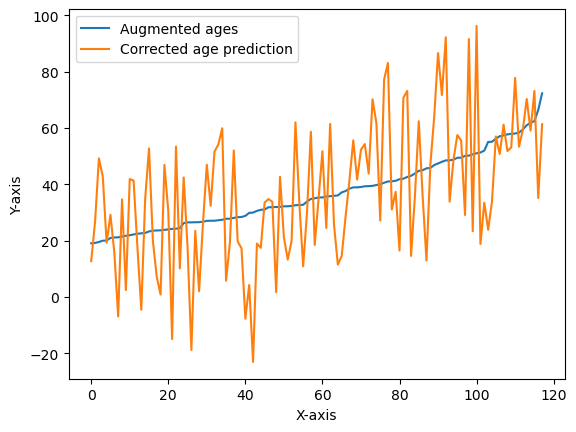

In [259]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

slope, intercept, r_value, p_value, std_err = stats.linregress(sorted[:,0], sorted[:,1])
print(slope)

corrected_age = (np.array(sorted[:,1]) - intercept)/slope

plt.scatter(sorted[:,0], corrected_age)

plt.title('Correlation between Actual Age and Corrected Predicted Age')
plt.xlabel('Actual Age')
plt.ylabel('Corrected Predicted Age')

plt.show()

x = range(len(aug_labels))
plt.plot(x, sorted[:,0], label='Augmented ages')
plt.plot(x, corrected_age, label='Corrected age prediction')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

In [260]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

svr = SVR(kernel='rbf')

fold_errors = []

y = aug_labels

kf = KFold(n_splits=10, shuffle=True)

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    svr.fit(X_train, y_train)
    
    y_pred = svr.predict(X_val)
    fold_error = mean_absolute_error(y_val, y_pred)
    
    fold_errors.append(fold_error)

for i, error in enumerate(fold_errors):
    print(f"Iteration {i+1}: Validation Error = {error}")

print("Average validation error: ", np.mean(fold_error))

Iteration 1: Validation Error = 11.384169192864386
Iteration 2: Validation Error = 9.243036729077396
Iteration 3: Validation Error = 9.683521991772567
Iteration 4: Validation Error = 9.874442129404981
Iteration 5: Validation Error = 13.767556569073763
Iteration 6: Validation Error = 12.5398232876725
Iteration 7: Validation Error = 9.933774538187942
Iteration 8: Validation Error = 11.28664135093458
Iteration 9: Validation Error = 9.9968995875674
Iteration 10: Validation Error = 7.693202289220474
Average validation error:  7.693202289220474


In [261]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

y = aug_labels

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)

clf = SVR(kernel='rbf')
clf.fit(X_train, y_train)

boosted_svr = AdaBoostRegressor(
    SVR(kernel='rbf'),
    n_estimators=1,
    random_state=1,
)
boosted_svr.fit(X_train, y_train)

standard_r2 = clf.score(X_test, y_test)
boosted_r2 = boosted_svr.score(X_test, y_test)

print(f"Standard SVR Test Set R^2: {standard_r2}")
print(f"Boosted SVR Test Set R^2: {boosted_r2}")
mae = sum(abs(regressor.predict(X) - aug_labels))/len(aug_labels)
print("MAE: ",mae)

Standard SVR Test Set R^2: -0.05481292217980949
Boosted SVR Test Set R^2: 0.006968497527866213
MAE:  9.575596609414427


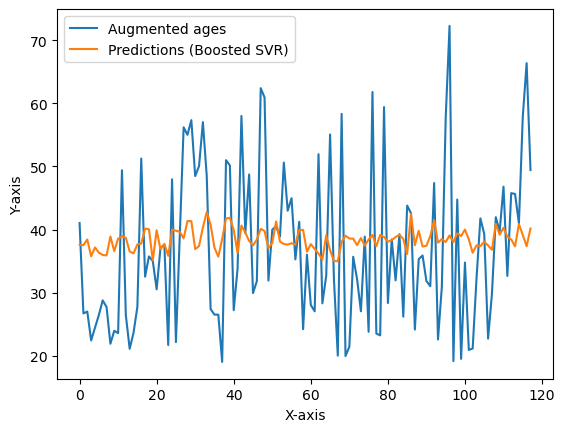

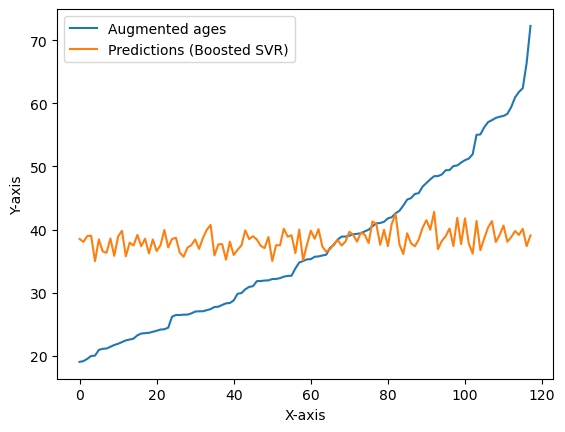

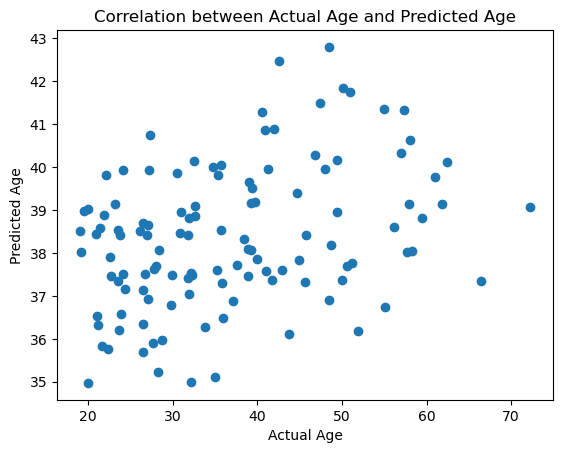

0.04670158790354238
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


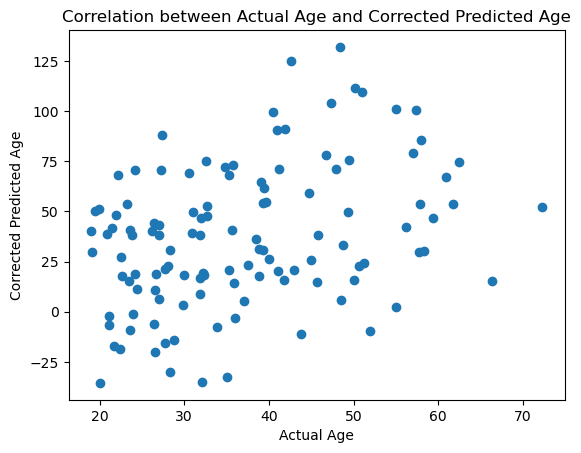

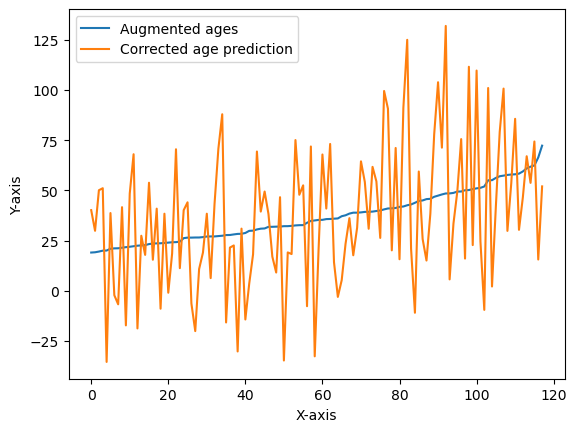

In [262]:
#Plotting predicted ages of boosted SVR
arr = np.zeros((len(y),2))
arr[:,0] = y
arr[:,1] = boosted_svr.predict(X)
x = range(len(aug_labels))
plt.plot(x, arr[:,0], label='Augmented ages')
plt.plot(x, arr[:,1], label='Predictions (Boosted SVR)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

sort = arr[arr[:, 0].argsort()]
x = range(len(aug_labels))
plt.plot(x, sort[:,0], label='Augmented ages')
plt.plot(x, sort[:,1], label='Predictions (Boosted SVR)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

#Correlations

plt.scatter(sort[:,0], sort[:,1])

plt.title('Correlation between Actual Age and Predicted Age')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')

plt.show()

# Correcting and plotting new prediction

from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(sort[:,0], sort[:,1])
print(slope)

corrected_age = (np.array(sort[:,1]) - intercept)/slope

plt.scatter(sort[:,0], corrected_age)

plt.title('Correlation between Actual Age and Corrected Predicted Age')
plt.xlabel('Actual Age')
plt.ylabel('Corrected Predicted Age')

plt.show()

x = range(len(aug_labels))
plt.plot(x, sort[:,0], label='Augmented ages')
plt.plot(x, corrected_age, label='Corrected age prediction')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()